# Introduction to OMNeT++

In [28]:
from manim import *

In [21]:
pip install simpy

Note: you may need to restart the kernel to use updated packages.


Simulation is a crucial tool in understanding and analyzing systems without implementing them physically. There are two main types of simulations:  

- **Continuous Simulation**: Used for systems where changes occur continuously over time.  
Examples: Differential equations, system dynamics.
- **Discrete Simulation**: Used for systems where changes happen at distinct events or time steps.  
Examples: Event-based simulations, fixed time step simulations.  

In [36]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(
    Image(
      url="https://mermaid.ink/img/"
      + base64_string
    )
  )
mm("""
graph TD
    A["Simulation"]
    A -->|"1"| B["Continuous Simulation"]
    A -->|"2"| C["Discrete Simulation"]
    
    B --> B1["Differential Equations"]
    B --> B2["Other dynamic system simulations"]
    
    C --> C1["Event-Based"]
    C --> C2["Fixed Time Step"]
    
    C1 --> D["Network Simulation"]
    D --> E["OMNET++"]
    D --> F["NS-3"]
    
    style E fill:#f9f,stroke:#333,stroke-width:4px

""")

In [33]:
class SimulationMethods(Scene):
    def construct(self):
        self.intro_simulation_methods()
        self.discrete_simulation()
        self.continuous_simulation()
        self.hybrid_simulation()

    def reset_scene(self):
        """Clears the screen and resets animations for the next 'slide'."""
        self.clear()

    def intro_simulation_methods(self):
        title = Text("Simulation Methods").to_edge(UP)
        description = Text(
            "Simulations are categorized into three main types:",
            font_size=28,
        ).next_to(title, DOWN)

        types = Text(
            "1. Discrete-Event Simulations\n"
            "2. Continuous Simulations\n"
            "3. Hybrid Simulations",
            font_size=28,
        ).next_to(description, DOWN)

        self.play(Write(title))
        self.play(FadeIn(description))
        self.wait(1)
        self.play(FadeIn(types))
        self.wait(2)
        self.reset_scene()

    def discrete_simulation(self):
        title = Text("Discrete-Event Simulation").to_edge(UP)
        explanation = Text(
            "Events occur at specific points in time.\n"
            "The system state changes only during these events.",
            font_size=24,
        ).next_to(title, DOWN)

        timeline = Line(LEFT * 5, RIGHT * 5, color=GRAY)
        events = [Dot(timeline.point_from_proportion(i / 10)) for i in range(2, 10, 2)]
        event_labels = [
            Text(f"Event {i+1}", font_size=20).next_to(dot, UP)
            for i, dot in enumerate(events)
        ]

        self.play(Write(title))
        self.play(FadeIn(explanation))
        self.play(Create(timeline))
        for dot, label in zip(events, event_labels):
            self.play(FadeIn(dot), Write(label))
            self.wait(0.5)

        self.wait(1)
        self.reset_scene()

    def continuous_simulation(self):
        title = Text("Continuous Simulation").to_edge(UP)
        explanation = Text(
            "The system evolves smoothly over time,\n"
            "with continuous changes in state.",
            font_size=24,
        ).next_to(title, DOWN)

        axes = Axes(
            x_range=[0, 10, 1], y_range=[0, 5, 1],
            axis_config={"include_numbers": True},
        )
        curve = axes.plot(lambda x: 0.1 * x**2, color=BLUE, x_range=[0, 10])
        label = Text("Continuous Evolution").next_to(axes, UP)

        self.play(Write(title))
        self.play(FadeIn(explanation))
        self.wait(1)
        self.play(FadeOut(title))
        self.play(Create(axes), Write(label))
        self.play(Create(curve), run_time=3)

        self.wait(1)
        self.reset_scene()

    def hybrid_simulation(self):
        title = Text("Hybrid Simulation").to_edge(UP)
        explanation = Text(
            "Combines discrete-event and continuous simulations.\n"
            "Events trigger smooth changes or vice versa.",
            font_size=24,
        ).next_to(title, DOWN)

        axes = Axes(
            x_range=[0, 10, 1], y_range=[0, 5, 1],
            axis_config={"include_numbers": True},
        )
        curve = axes.plot(
            lambda x: 0.1 * x**2 if x < 5 else 2,
            color=BLUE,
            x_range=[0, 10],
        )
        discrete_event = Dot(axes.c2p(6, 2), color=RED)
        event_label = Text("Event", font_size=20, color=RED).next_to(discrete_event, UP)

        self.play(Write(title))
        self.play(FadeIn(explanation))
        self.play(Create(axes))
        self.play(Create(curve), run_time=3)
        self.play(FadeIn(discrete_event), Write(event_label))
        self.wait(1)
        self.reset_scene()

In [37]:
%manim -qh -v WARNING SimulationMethods

Manim Community v0.18.1

#### Some examples

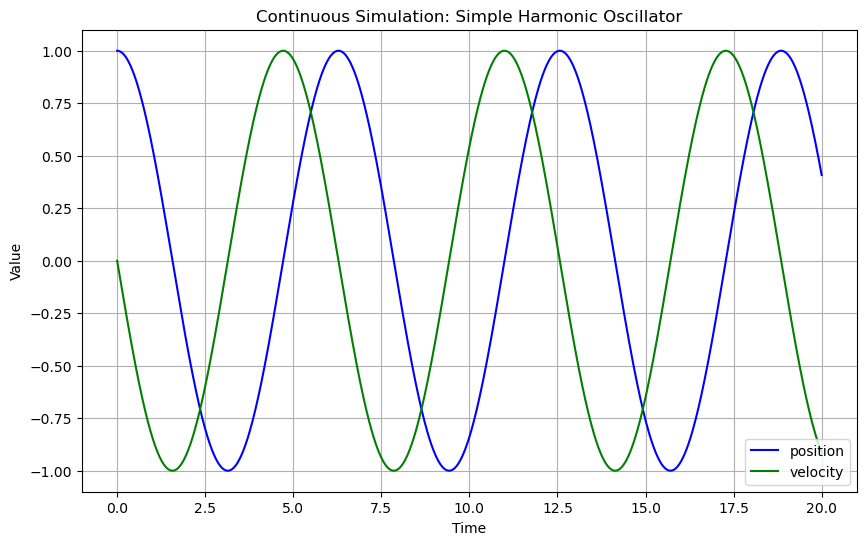

This continuous simulation models a simple harmonic oscillator using differential equations.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equation (simple harmonic oscillator)
def model(y, t, k, m):
    dydt = [y[1], -k/m * y[0]]
    return dydt

# Set parameters
k = 1.0  # spring constant
m = 1.0  # mass

# Initial conditions
y0 = [1.0, 0.0]

# Time points
t = np.linspace(0, 20, 1000)

# Solve ODE
solution = odeint(model, y0, t, args=(k, m))

plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], 'b', label='position')
plt.plot(t, solution[:, 1], 'g', label='velocity')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Continuous Simulation: Simple Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

print("This continuous simulation models a simple harmonic oscillator using differential equations.")

Customer 1 arrives at 33.95
Customer 1 waits 0.00
Customer 1 leaves at 34.27
Customer 2 arrives at 37.40
Customer 2 waits 0.00
Customer 3 arrives at 37.53
Customer 2 leaves at 38.33
Customer 3 waits 0.80
Customer 3 leaves at 39.77
Customer 4 arrives at 39.86
Customer 4 waits 0.00
Customer 4 leaves at 43.54
Customer 5 arrives at 48.21
Customer 5 waits 0.00
Customer 6 arrives at 51.29
Customer 5 leaves at 55.72
Customer 6 waits 4.43
Customer 6 leaves at 55.74
Customer 7 arrives at 60.76
Customer 7 waits 0.00
Customer 8 arrives at 61.29
Customer 9 arrives at 61.97
Customer 7 leaves at 63.30
Customer 8 waits 2.01
Customer 10 arrives at 63.98
Customer 11 arrives at 70.24
Customer 8 leaves at 71.11
Customer 9 waits 9.14
Customer 12 arrives at 72.82
Customer 9 leaves at 75.19
Customer 10 waits 11.20
Customer 13 arrives at 76.27
Customer 10 leaves at 78.23
Customer 11 waits 7.98
Customer 11 leaves at 81.06
Customer 12 waits 8.24
Customer 14 arrives at 82.08
Customer 12 leaves at 84.01
Customer

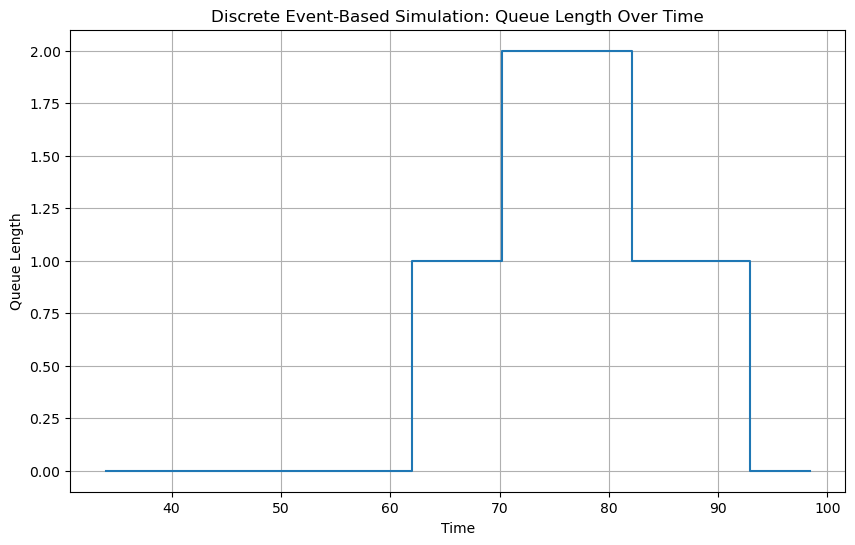

This discrete event-based simulation models a simple queueing system.


In [24]:
import simpy
import random
import matplotlib.pyplot as plt

# Event-based simulation of a simple queue
class Server:
    def __init__(self, env, serve_time):
        self.env = env
        self.serve_time = serve_time
        self.queue_lengths = []
        self.times = []

    def serve(self, customer):
        yield self.env.timeout(random.expovariate(1.0 / self.serve_time))

def customer(env, name, server):
    arrive = env.now
    print(f'{name} arrives at {arrive:.2f}')
    
    with server.resource.request() as req:
        yield req
        wait = env.now - arrive
        print(f'{name} waits {wait:.2f}')
        yield env.process(server.serve(name))
        print(f'{name} leaves at {env.now:.2f}')

def setup(env, server):
    i = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / 4))  # New customer every 4 minutes on average
        i += 1
        env.process(customer(env, f'Customer {i}', server))
        server.queue_lengths.append(len(server.resource.queue))
        server.times.append(env.now)

# Create environment and start processes
env = simpy.Environment()
server = Server(env, serve_time=3)
server.resource = simpy.Resource(env, capacity=1)
env.process(setup(env, server))

# Run the simulation
env.run(until=100)

# Plot results
plt.figure(figsize=(10, 6))
plt.step(server.times, server.queue_lengths, where='post')
plt.xlabel('Time')
plt.ylabel('Queue Length')
plt.title('Discrete Event-Based Simulation: Queue Length Over Time')
plt.grid(True)
plt.show()

print("This discrete event-based simulation models a simple queueing system.")

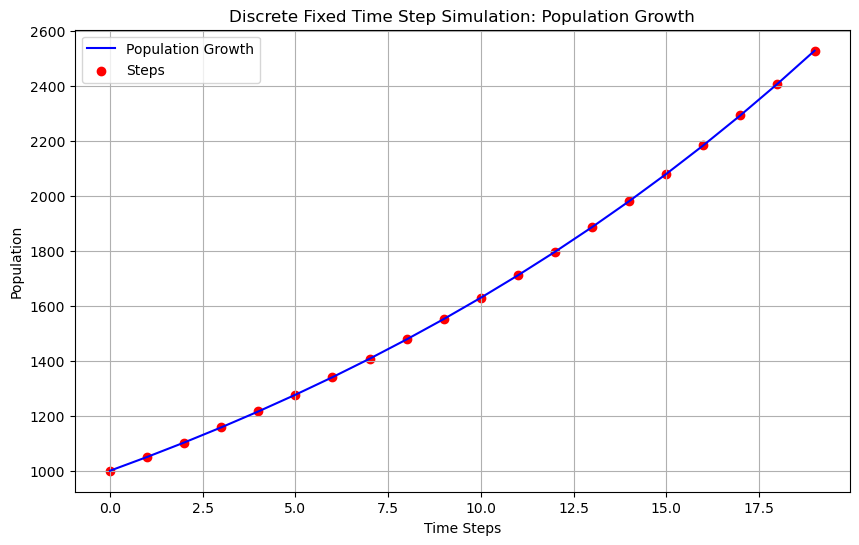

This discrete fixed time step simulation models population growth over time.


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed time step simulation of population growth
def population_growth(initial_population, growth_rate, time_steps):
    population = [initial_population]
    for _ in range(1, time_steps):
        new_population = population[-1] * (1 + growth_rate)
        population.append(new_population)
    return population

initial_population = 1000
growth_rate = 0.05
time_steps = 20

population = population_growth(initial_population, growth_rate, time_steps)

plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), population, 'b-', label="Population Growth")
plt.scatter(range(time_steps), population, color='red', label="Steps")
plt.xlabel('Time Steps')
plt.ylabel('Population')
plt.title('Discrete Fixed Time Step Simulation: Population Growth')
plt.grid(True)
plt.legend()
plt.show()

print("This discrete fixed time step simulation models population growth over time.")


Focus on Discrete Event-Based Simulation
In discrete event-based simulations, changes in the system are driven by events such as:

- Packet arrivals
- Signal transmissions
- State transitions  

These simulations are especially relevant for modeling communication networks, queuing systems, and distributed systems.


#### Why OMNeT++?
OMNeT++ is a key tool in this domain due to:

- **Flexibility**: Modular design allows users to create and extend simulations easily.
- **Visualization**: Built-in tools for understanding simulation dynamics.
- **Community Support** : Open-source nature with a vast user base and frameworks.